In [2]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


from config import STRAINS

In [5]:
X = np.load('./X_reference.npy') 
y = np.load('./y_reference.npy')

In [8]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

                   precision    recall  f1-score   support

      C. albicans       1.00      1.00      1.00       613
      C. glabrata       1.00      1.00      1.00       611
     K. aerogenes       0.76      0.84      0.80       600
        E. coli 1       0.87      0.86      0.86       636
        E. coli 2       0.89      0.90      0.89       605
       E. faecium       0.99      0.99      0.99       586
    E. faecalis 1       0.76      0.83      0.79       609
    E. faecalis 2       0.78      0.73      0.76       574
       E. cloacae       0.74      0.75      0.75       584
  K. pneumoniae 1       0.95      0.94      0.95       596
  K. pneumoniae 2       0.93      0.95      0.94       593
     P. mirabilis       0.90      0.90      0.90       578
  P. aeruginosa 1       0.98      0.98      0.98       583
  P. aeruginosa 2       0.99      0.99      0.99       585
           MSSA 1       0.95      0.97      0.96       591
           MSSA 3       0.93      0.91      0.92       

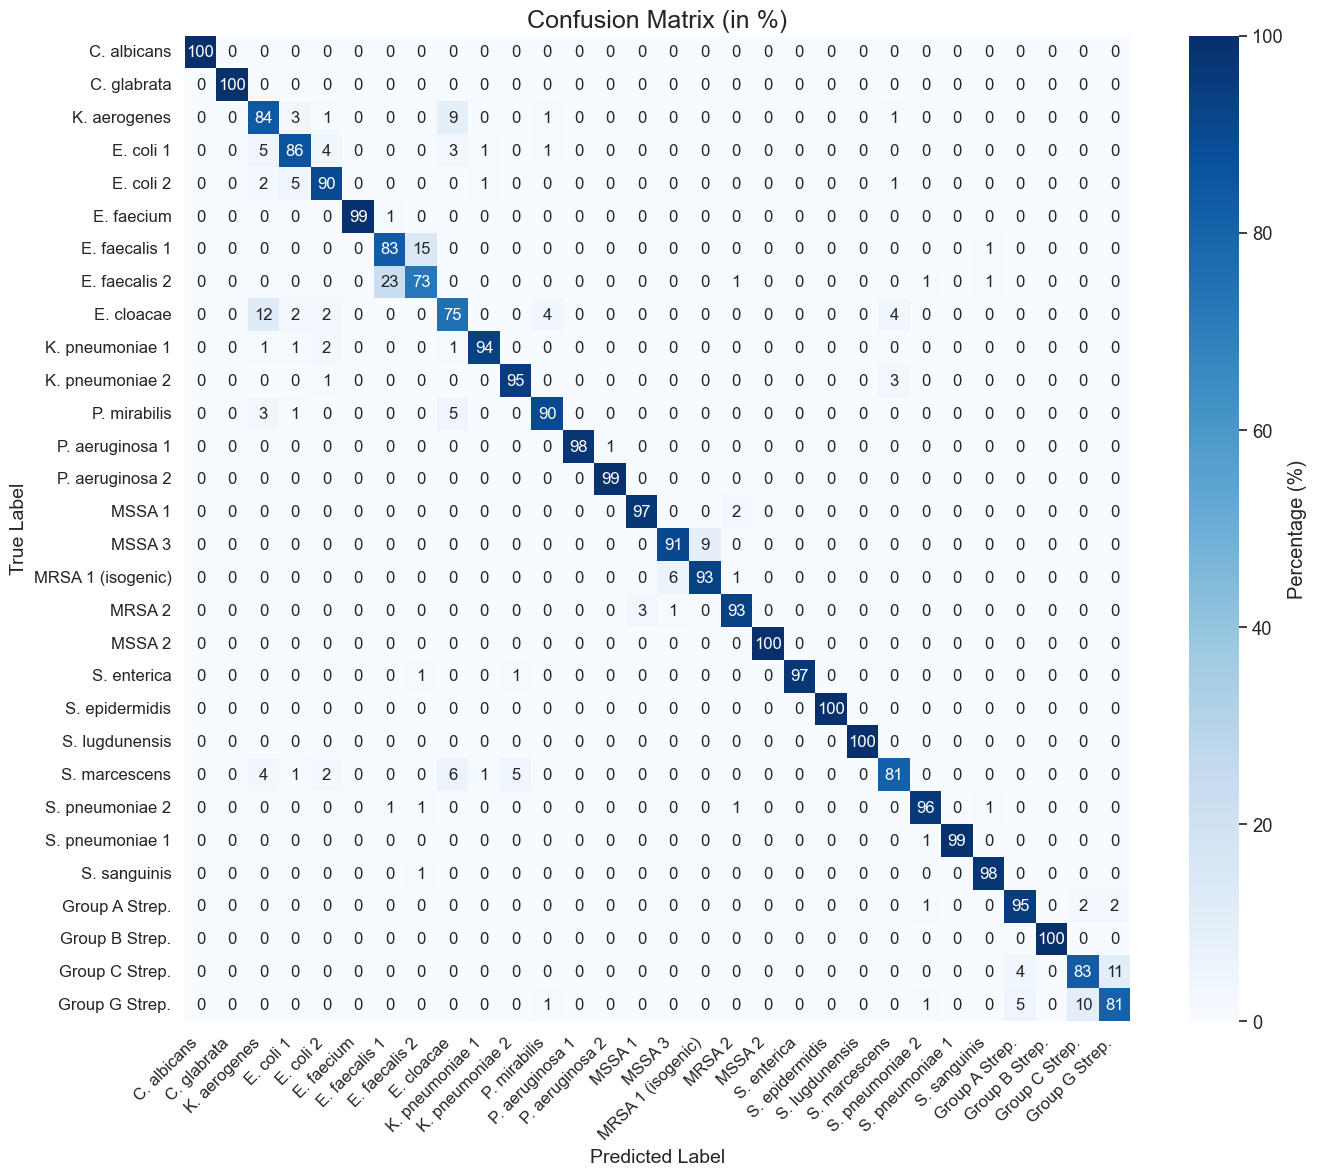

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



# Step 1: Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 2: Initialize and train the SVM classifier
svm_classifier = SVC(kernel='linear', C=1, random_state=42)
svm_classifier.fit(X_train_scaled, y_train)

# Step 3: Make predictions
y_pred = svm_classifier.predict(X_test_scaled)

# Step 4: Print classification report
print(classification_report(y_test, y_pred, target_names=[STRAINS[i] for i in range(len(STRAINS))], zero_division=1))

# Step 5: Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Step 6: Convert the confusion matrix to percentages
conf_matrix_percent = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis] * 100
conf_matrix_percent = np.round(conf_matrix_percent, 0).astype(int)

# Step 7: Plot the confusion matrix as a heatmap
plt.figure(figsize=(14, 12))
sns.set(font_scale=1.2)
heatmap = sns.heatmap(conf_matrix_percent, annot=True, fmt="d", cmap="Blues", 
                      xticklabels=[STRAINS[i] for i in range(len(STRAINS))], 
                      yticklabels=[STRAINS[i] for i in range(len(STRAINS))],
                      annot_kws={"size": 12}, cbar_kws={'label': 'Percentage (%)'})

plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.title('Confusion Matrix (in %)', fontsize=18)
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=12)
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0, fontsize=12)
plt.tight_layout()
plt.show()
